In [31]:
import json
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt


In [32]:
# I have clusters that are created based on the uarch stats of each region running on azacca

with open("cluster_based_on_uarch.json") as f:
    azacca_cluster = json.load(f)

with open("azacca-papi-profiling-data.json") as f:
    azacca_data = json.load(f)

with open("challenger-papi-profiling-data.json") as f:
    challenger_data = json.load(f)

# how well does the clusters cluster the uarch stats of the regions?


In [33]:
target_k = 10
target_bench = "bt"

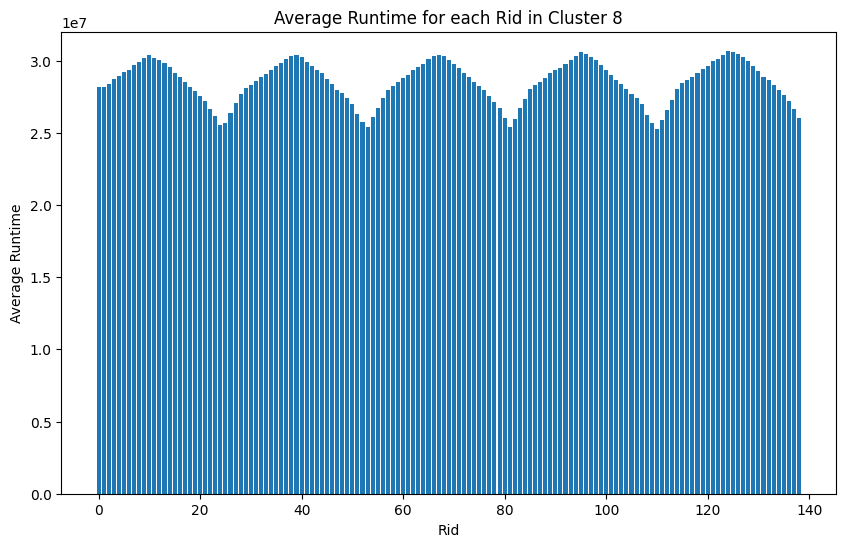

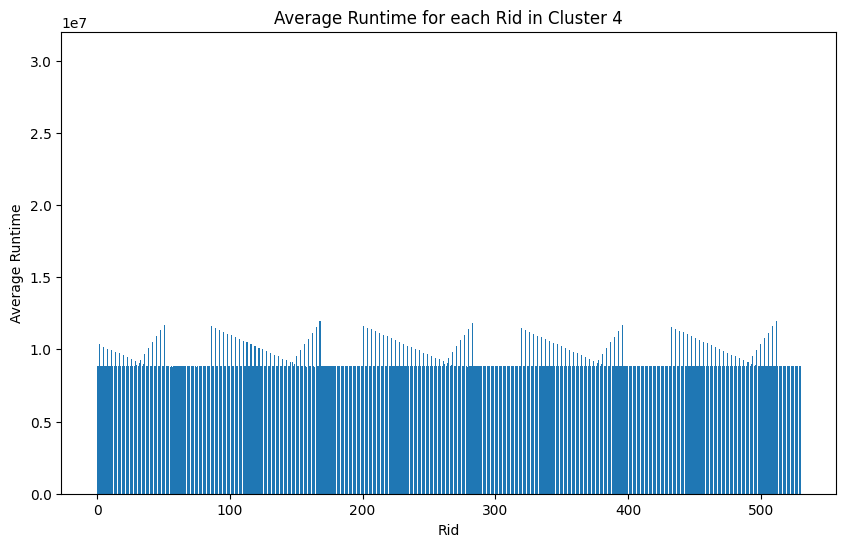

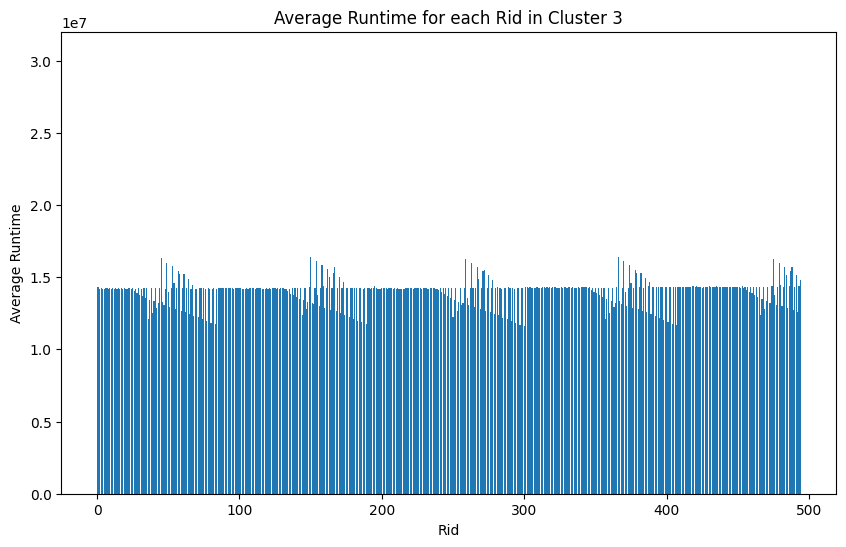

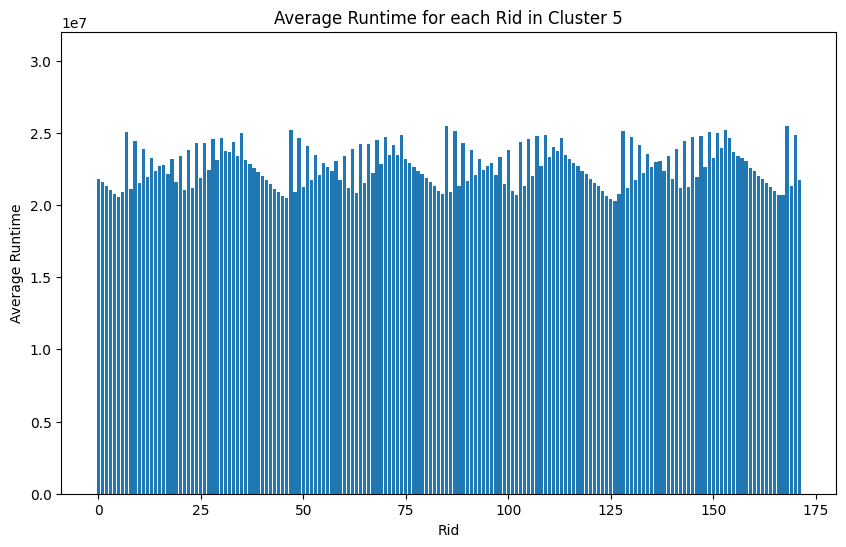

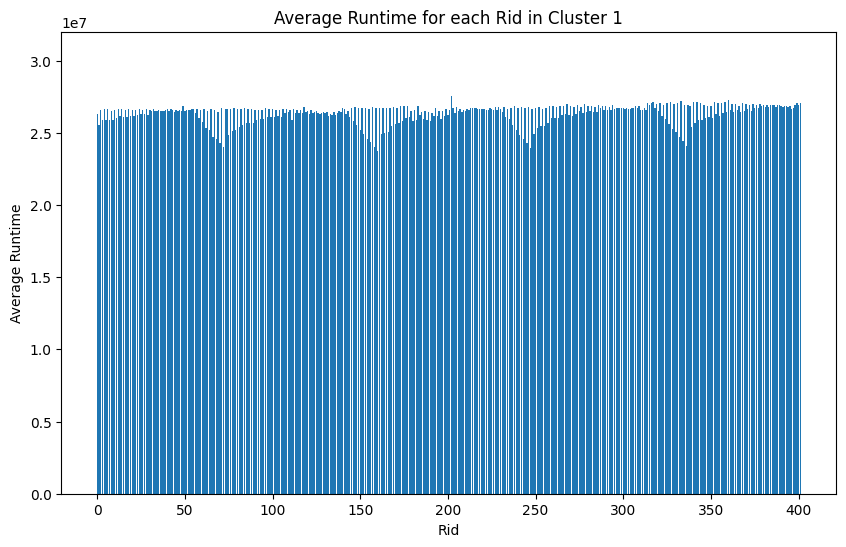

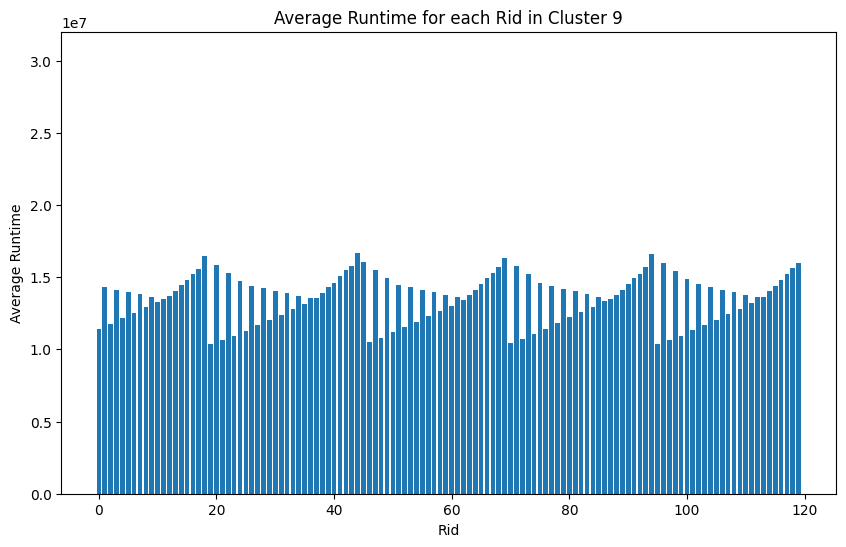

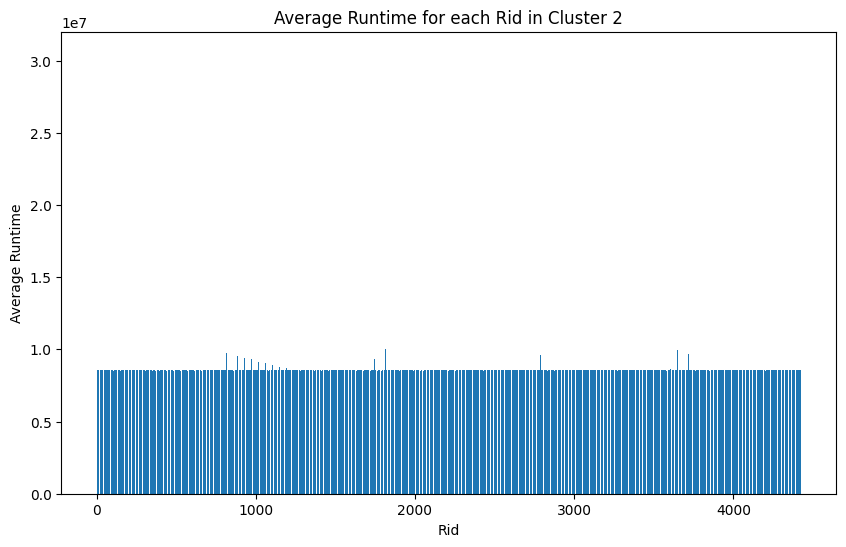

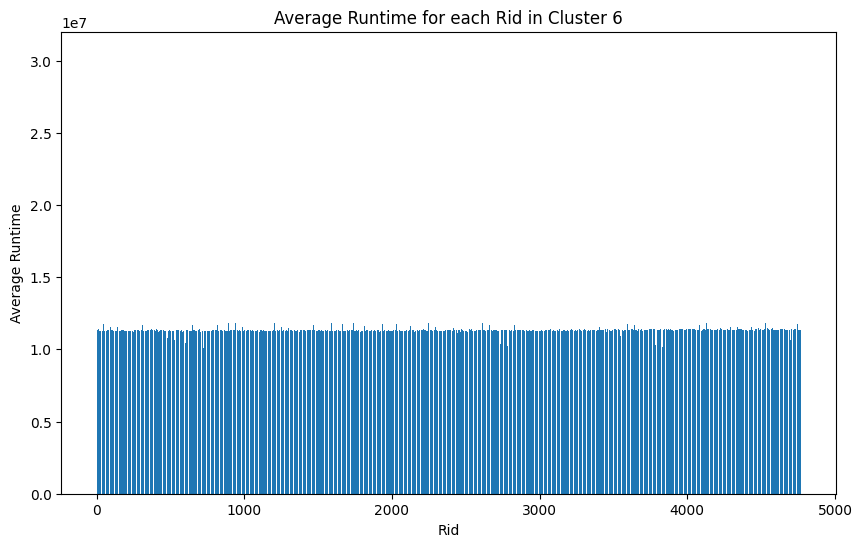

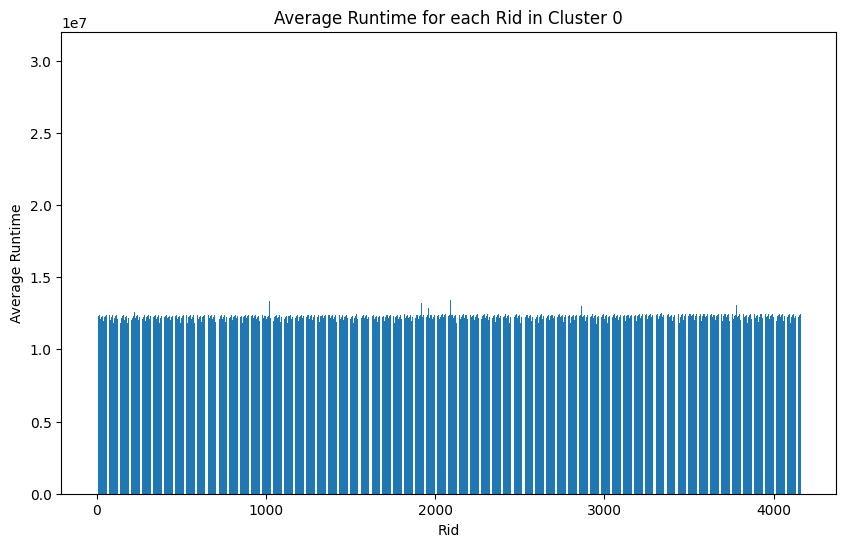

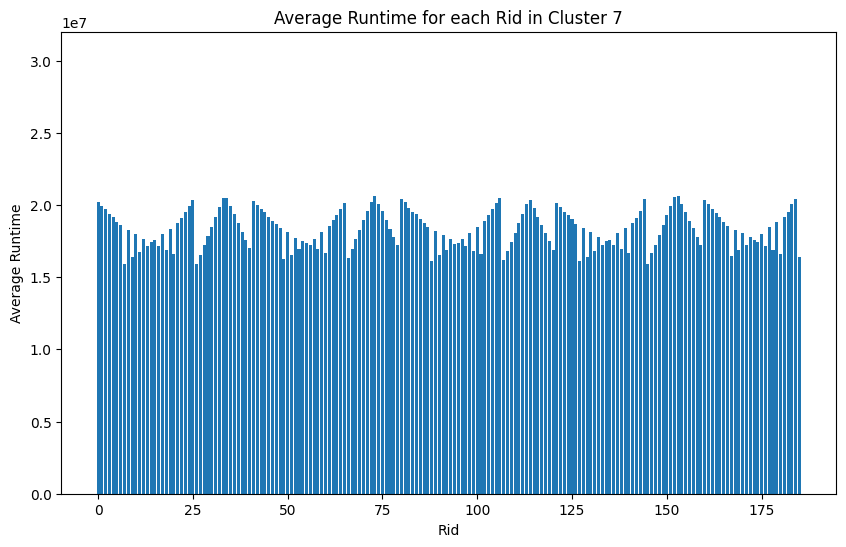

In [34]:
target_data = azacca_data[target_bench]
target_clusters = azacca_cluster[target_bench][str(target_k)]["clusters"]

for cid, cluster in target_clusters.items():
    rid_list = []
    runtime_list = []
    for rid in cluster:
        rid_list.append(str(rid))
        runtime_list.append(sum(target_data[str(rid)]["runtime"])/len(target_data[str(rid)]["runtime"]))
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(rid_list)), runtime_list)  # Use range for x values
    plt.ylim(0, 32000000)
    plt.xlabel('Rid')
    plt.ylabel('Average Runtime')
    plt.title(f'Average Runtime for each Rid in Cluster {cid}')
    plt.show()
    

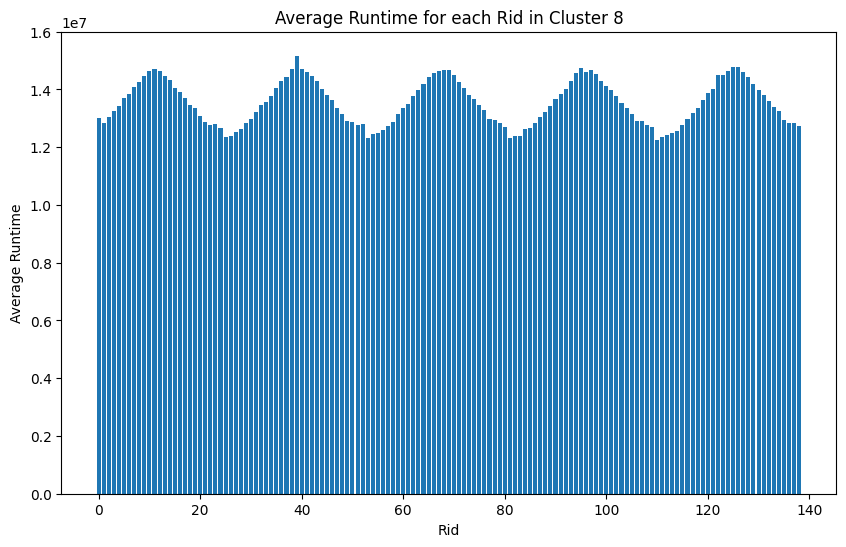

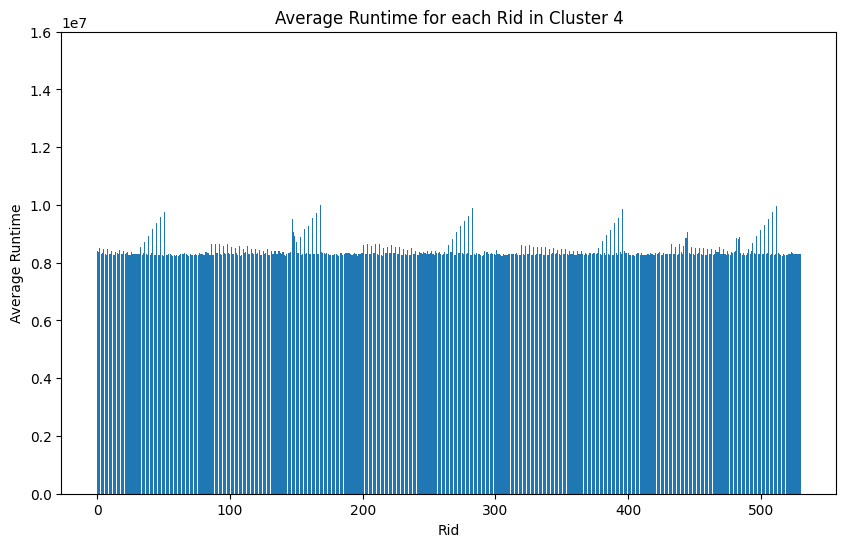

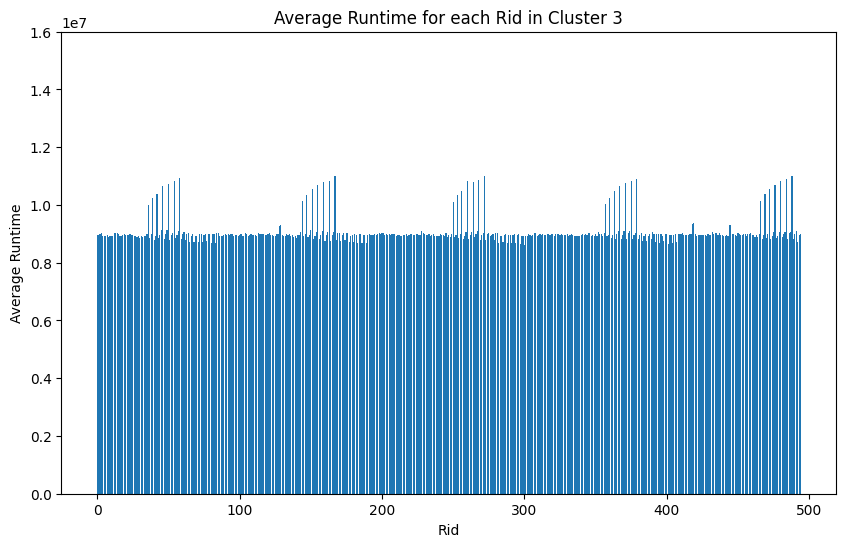

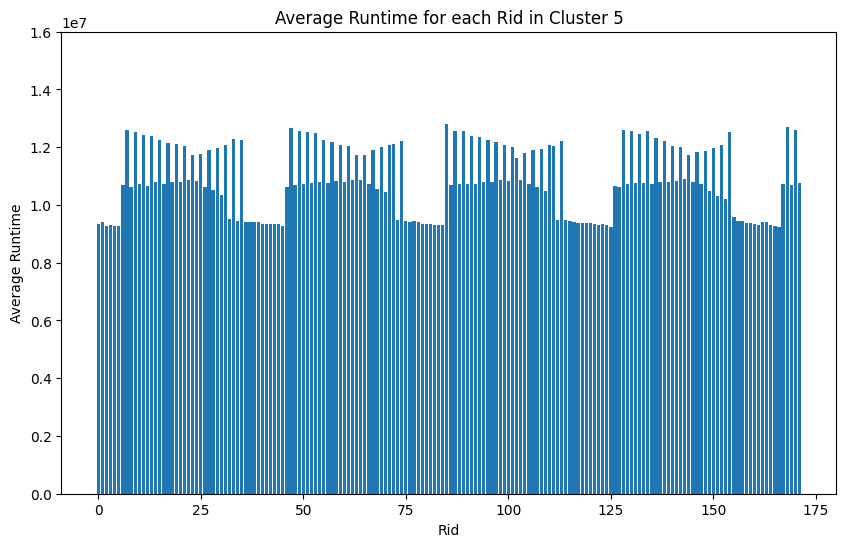

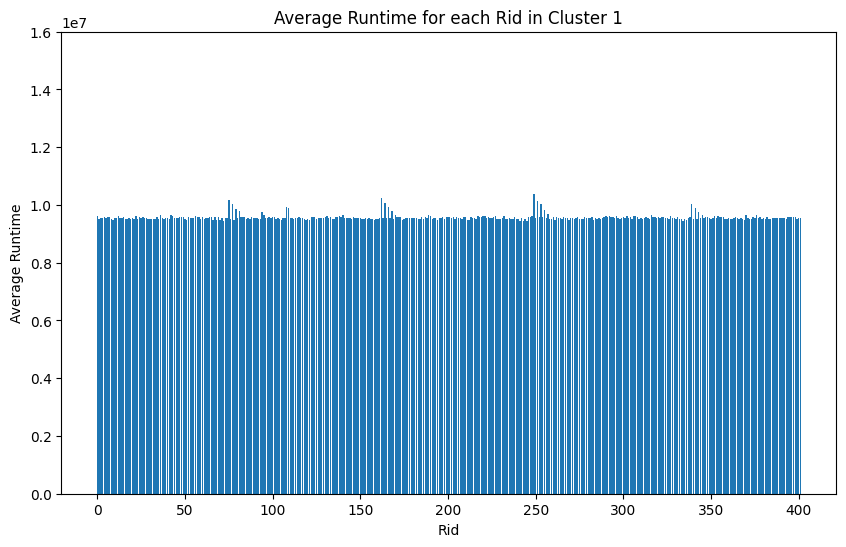

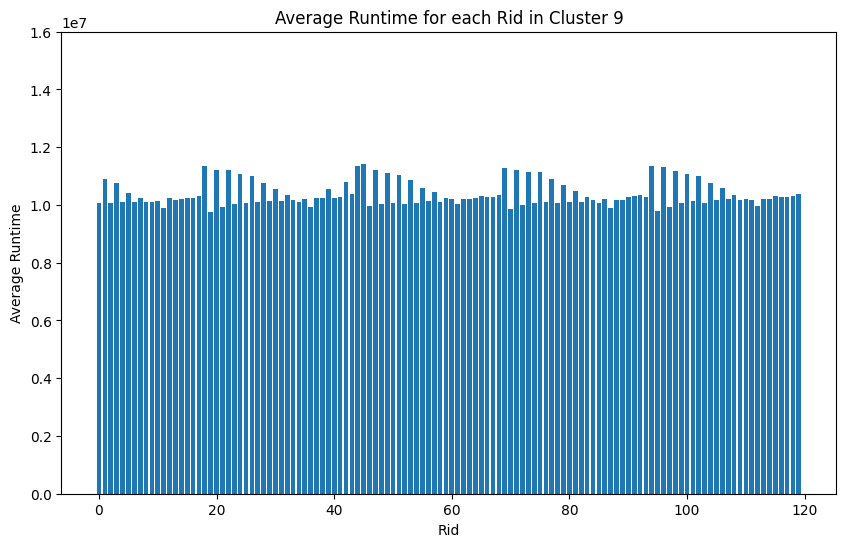

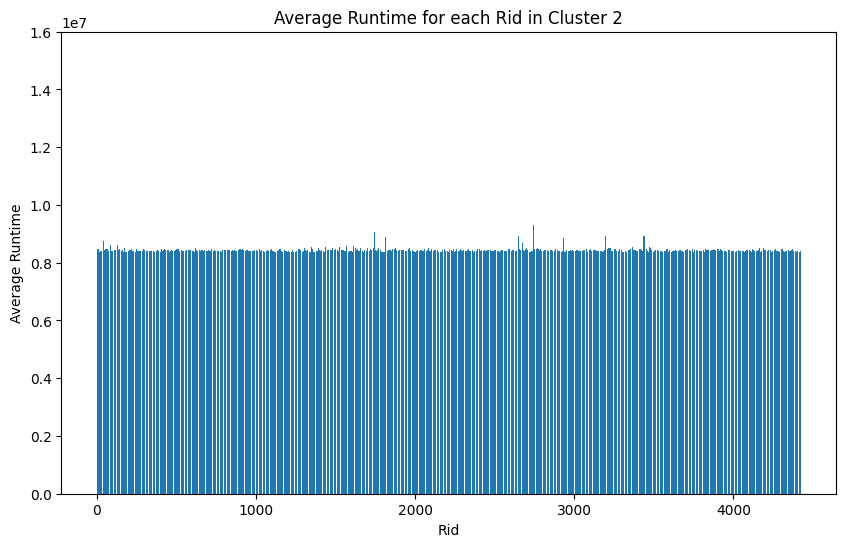

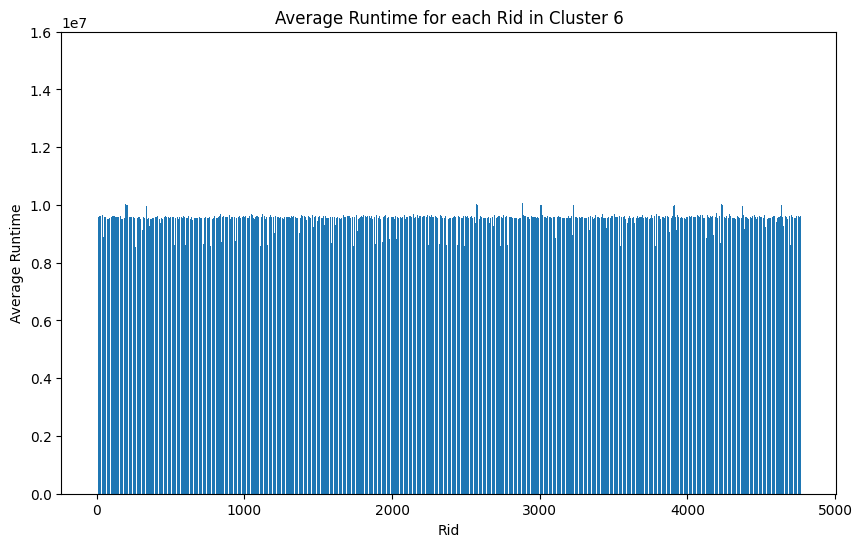

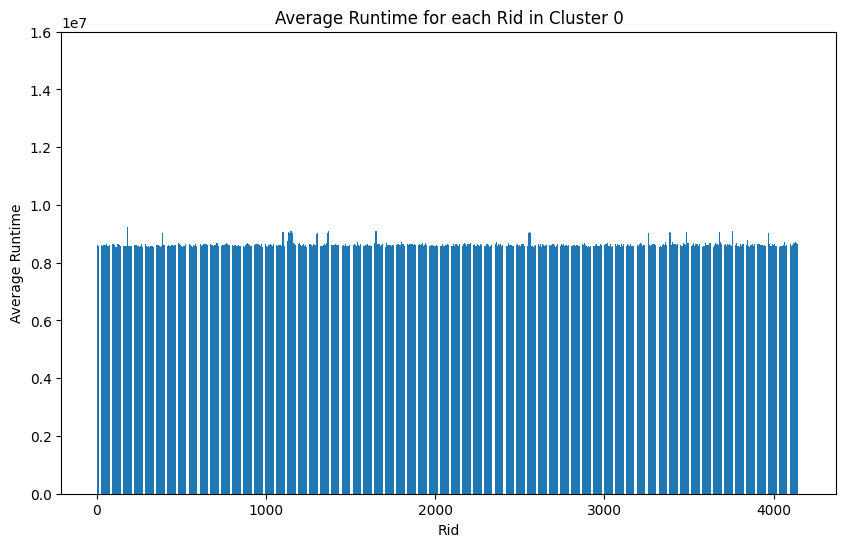

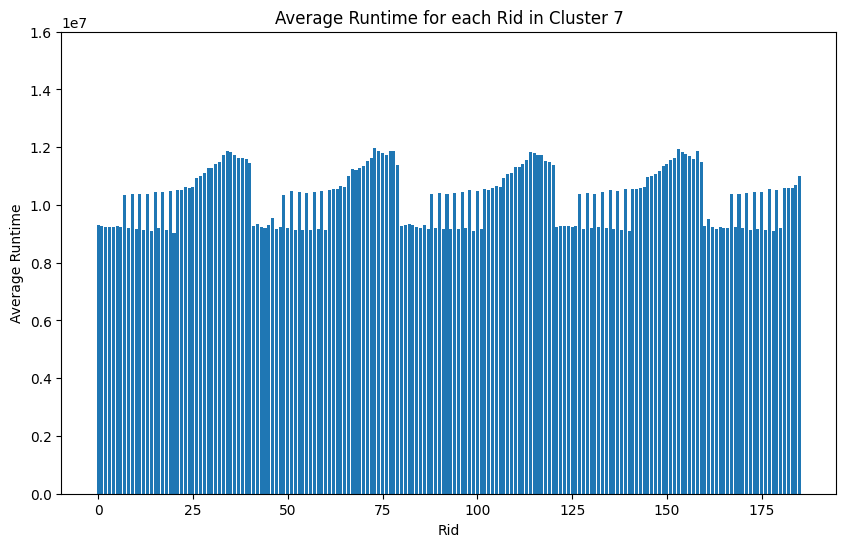

In [35]:
target_data = challenger_data[target_bench]

for cid, cluster in target_clusters.items():
    rid_list = []
    runtime_list = []
    for rid in cluster:
        rid_list.append(str(rid))
        runtime_list.append(sum(target_data[str(rid)]["runtime"])/len(target_data[str(rid)]["runtime"]))
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(rid_list)), runtime_list)  # Use range for x values
    plt.ylim(0, 16000000)
    plt.xlabel('Rid')
    plt.ylabel('Average Runtime')
    plt.title(f'Average Runtime for each Rid in Cluster {cid}')
    plt.show()
    

In [38]:
target_azacca_data = azacca_data[target_bench]
target_challenger_data = challenger_data[target_bench]
target_clusters = azacca_cluster[target_bench][str(target_k)]["clusters"]

# Calculate the number of rows for subplots
n = len(target_clusters)
rows = n // 2
rows += n % 2

plt.figure(figsize=(18, 6 * rows))

for i, (cid, cluster) in enumerate(target_clusters.items(), start=1):
    azacca_rid_list = []
    azacca_runtime_list = []
    challenger_rid_list = []
    challenger_runtime_list = []
    for rid in cluster:
        azacca_rid_list.append(str(rid))
        azacca_runtime_list.append(sum(target_azacca_data[str(rid)]["runtime"])/len(target_azacca_data[str(rid)]["runtime"]))
        challenger_rid_list.append(str(rid))
        challenger_runtime_list.append(sum(target_challenger_data[str(rid)]["runtime"])/len(target_challenger_data[str(rid)]["runtime"]))
    # Create a subplot
    plt.subplot(rows, 2, i)
    
    # Create an array with the position of each bar along the x-axis
    r1 = np.arange(len(azacca_rid_list))
    r2 = [x + 0.4 for x in r1]

    # Plot bars
    plt.bar(r1, azacca_runtime_list, width=0.4, label='azacca')
    plt.bar(r2, challenger_runtime_list, width=0.4, label='challenger')

    plt.ylim(0, 32000000)
    plt.xticks([r + 0.2 for r in range(len(azacca_rid_list))], azacca_rid_list)  # Set x-ticks to be rid_list
    plt.xlabel('Rid')
    plt.ylabel('Average Runtime')
    plt.title(f'Average Runtime for each Rid in Cluster {cid}')
    plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
    

KeyboardInterrupt: 